In [ ]:
!pip install tensorflow
!pip install imbalanced-learn
!pip install scikit-learn
!pip install pandas numpy matplotlib seaborn

In [ ]:
from google.colab import files
import pandas as pd
import os

print("=" * 70)
print("            UPLOAD DATASET - FRAUD DETECTION")
print("=" * 70)


print("\n Step 1: Upload TRAIN_TRANSACTION.CSV.CRDOWNLOAD")
print("-" * 70)
print(" Click 'Choose Files' button below")
print(" Select your file (even if it has .crdownload)")
print("-" * 70)

uploaded_train = files.upload()


print("\n Step 2: Upload TEST_TRANSACTION.CSV.CRDOWNLOAD")
print("-" * 70)
print(" Click 'Choose Files' button below")
print(" Select your file (even if it has .crdownload)")
print("-" * 70)

uploaded_test = files.upload()


print("\n" + "=" * 70)
print("           🔧 PROCESSING FILES")
print("=" * 70)

all_files = os.listdir()
print(f"Files uploaded: {[f for f in all_files if 'transaction' in f.lower()]}\n")


if 'train_transaction.csv.crdownload' in all_files:
    os.rename('train_transaction.csv.crdownload', 'train_transaction.csv')
    print(" Renamed: train_transaction.csv.crdownload → train_transaction.csv")

if 'test_transaction.csv.crdownload' in all_files:
    os.rename('test_transaction.csv.crdownload', 'test_transaction.csv')
    print(" Renamed: test_transaction.csv.crdownload → test_transaction.csv")


print("\n" + "=" * 70)
print("            VERIFYING FILES")
print("=" * 70)

csv_files = [f for f in os.listdir() if f.endswith('.csv')]
if len(csv_files) > 0:
    for file in csv_files:
        file_size = os.path.getsize(file) / (1024 * 1024)
        print(f" {file} ({file_size:.2f} MB)")
else:
    print(" No CSV files found!")


print("\n" + "=" * 70)
print("            LOADING DATASETS")
print("=" * 70)

try:
    train_df = pd.read_csv('train_transaction.csv')
    print(f"\n TRAIN DATASET LOADED!")
    print(f"    Shape: {train_df.shape[0]:,} rows × {train_df.shape[1]} columns")
    print(f"    Columns (first 5): {list(train_df.columns[:5])}")

    if 'isFraud' in train_df.columns:
        fraud_count = train_df['isFraud'].sum()
        total = len(train_df)
        print(f"    Target: isFraud")
        print(f"      Fraud: {fraud_count:,} ({fraud_count/total*100:.2f}%)")
        print(f"      Normal: {total-fraud_count:,} ({(total-fraud_count)/total*100:.2f}%)")

    print(f"\n   Preview:")
    print(train_df.head(3))

except Exception as e:
    print(f" Error loading train: {e}")

print("\n" + "-" * 70)

try:
    test_df = pd.read_csv('test_transaction.csv')
    print(f"\n TEST DATASET LOADED!")
    print(f"    Shape: {test_df.shape[0]:,} rows × {test_df.shape[1]} columns")
    print(f"    Columns (first 5): {list(test_df.columns[:5])}")

    if 'TransactionID' in test_df.columns:
        print(f"    TransactionID found (for submission)")

    print(f"\n   Preview:")
    print(test_df.head(3))

except Exception as e:
    print(f" Error loading test: {e}")

print("\n" + "=" * 70)
print("            SETUP COMPLETE!")
print("=" * 70)
print("\n✓ Variables: train_df, test_df")
print("✓ Ready for next step!")
print("=" * 70)

            UPLOAD DATASET - FRAUD DETECTION

 Step 1: Upload TRAIN_TRANSACTION.CSV.CRDOWNLOAD
----------------------------------------------------------------------
 Click 'Choose Files' button below
 Select your file (even if it has .crdownload)
----------------------------------------------------------------------


Saving train_transaction.csv.crdownload to train_transaction.csv.crdownload

 Step 2: Upload TEST_TRANSACTION.CSV.CRDOWNLOAD
----------------------------------------------------------------------
 Click 'Choose Files' button below
 Select your file (even if it has .crdownload)
----------------------------------------------------------------------


Saving test_transaction.csv.crdownload to test_transaction.csv.crdownload

           🔧 PROCESSING FILES
Files uploaded: ['test_transaction.csv.crdownload', 'train_transaction.csv', 'train_transaction.csv.crdownload', 'midterm_transaction_data.ipynb', 'test_transaction.csv']

 Renamed: train_transaction.csv.crdownload → train_transaction.csv
 Renamed: test_transaction.csv.crdownload → test_transaction.csv

            VERIFYING FILES
 train_transaction.csv (13.18 MB)
 midterm-regresi-dataset.csv (19.93 MB)
 fraud_detection_submission.csv (2.38 MB)
 test_transaction.csv (129.80 MB)

           📊 LOADING DATASETS

 TRAIN DATASET LOADED!
    Shape: 13,001 rows × 394 columns
    Columns (first 5): ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD']
    Target: isFraud
      Fraud: 354 (2.72%)
      Normal: 12,647 (97.28%)

   Preview:
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.

            EXPLORATORY DATA ANALYSIS

 DATASET INFORMATION
----------------------------------------------------------------------
Train shape: (13001, 394)
Test shape: (117701, 393)

Memory usage: 45.14 MB

 MISSING VALUES ANALYSIS
----------------------------------------------------------------------

Columns with missing values: 344

Top 10 columns with most missing values:
    Column  Missing  Percentage
37      D7    12723   97.861703
43     D13    12674   97.484809
14   dist2    12518   96.284901
42     D12    12505   96.184909
44     D14    12454   95.792631
36      D6    12386   95.269595
39      D9    11475   88.262441
38      D8    11475   88.262441
205   V151    11022   84.778094
194   V140    11022   84.778094

 TARGET DISTRIBUTION (isFraud)
----------------------------------------------------------------------
isFraud
0    12647
1      354
Name: count, dtype: int64

Class Imbalance Ratio: 1:35.73


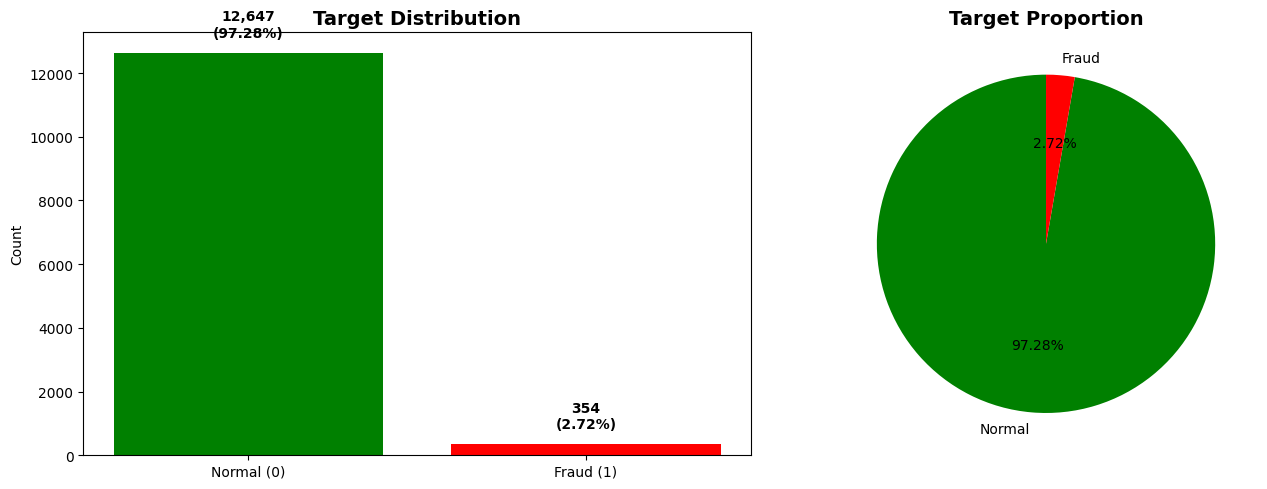


 DATA TYPES
----------------------------------------------------------------------
float64    376
object      14
int64        4
Name: count, dtype: int64

✓ Numerical columns: 380
✓ Categorical columns: 14

 EDA COMPLETE!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 70)
print("            EXPLORATORY DATA ANALYSIS")
print("=" * 70)


print("\n DATASET INFORMATION")
print("-" * 70)
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"\nMemory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


print("\n MISSING VALUES ANALYSIS")
print("-" * 70)
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing': missing.values,
    'Percentage': missing_pct.values
}).sort_values('Missing', ascending=False)

print(f"\nColumns with missing values: {(missing > 0).sum()}")
print("\nTop 10 columns with most missing values:")
print(missing_df[missing_df['Missing'] > 0].head(10))


print("\n TARGET DISTRIBUTION (isFraud)")
print("-" * 70)
fraud_counts = train_df['isFraud'].value_counts()
print(fraud_counts)
print(f"\nClass Imbalance Ratio: 1:{fraud_counts[0]/fraud_counts[1]:.2f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].bar(['Normal (0)', 'Fraud (1)'], fraud_counts.values, color=['green', 'red'])
axes[0].set_title('Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 500, f"{v:,}\n({v/len(train_df)*100:.2f}%)",
                 ha='center', fontweight='bold')


axes[1].pie(fraud_counts.values, labels=['Normal', 'Fraud'], autopct='%1.2f%%',
            colors=['green', 'red'], startangle=90)
axes[1].set_title('Target Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


print("\n DATA TYPES")
print("-" * 70)
dtype_counts = train_df.dtypes.value_counts()
print(dtype_counts)


numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"\n✓ Numerical columns: {len(numerical_cols)}")
print(f"✓ Categorical columns: {len(categorical_cols)}")

print("\n EDA COMPLETE!")

In [ ]:
from sklearn.impute import SimpleImputer

print("=" * 70)
print("            HANDLING MISSING VALUES")
print("=" * 70)

train_processed = train_df.copy()
test_processed = test_df.copy()

if 'isFraud' in train_processed.columns:
    y_train = train_processed['isFraud']
    X_train = train_processed.drop('isFraud', axis=1)
else:
    X_train = train_processed

X_test = test_processed.copy()

train_ids = X_train['TransactionID'] if 'TransactionID' in X_train.columns else None
test_ids = X_test['TransactionID'] if 'TransactionID' in X_test.columns else None

cols_to_drop = ['TransactionID']
X_train = X_train.drop(cols_to_drop, axis=1, errors='ignore')
X_test = X_test.drop(cols_to_drop, axis=1, errors='ignore')

print("\n Strategy for missing values:")
print("-" * 70)


high_missing_cols = []
for col in X_train.columns:
    missing_pct = X_train[col].isnull().sum() / len(X_train) * 100
    if missing_pct > 80:
        high_missing_cols.append(col)

print(f"✓ Columns with >80% missing: {len(high_missing_cols)}")
print(f"  → Will be DROPPED: {high_missing_cols[:5]}..." if len(high_missing_cols) > 5 else f"  → Will be DROPPED: {high_missing_cols}")


X_train = X_train.drop(high_missing_cols, axis=1)
X_test = X_test.drop(high_missing_cols, axis=1)


numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"\n✓ Remaining numerical columns: {len(numerical_cols)}")
print(f"✓ Remaining categorical columns: {len(categorical_cols)}")


print("\n Imputing numerical columns with MEDIAN...")
num_imputer = SimpleImputer(strategy='median')
X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])


if len(categorical_cols) > 0:
    print(f" Imputing categorical columns with MOST FREQUENT...")
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])


print("\n Missing values after imputation:")
print(f"   Train: {X_train.isnull().sum().sum()}")
print(f"   Test: {X_test.isnull().sum().sum()}")

print("\n PREPROCESSING PART 1 COMPLETE!")
print(f"   Train shape: {X_train.shape}")
print(f"   Test shape: {X_test.shape}")

            HANDLING MISSING VALUES

 Strategy for missing values:
----------------------------------------------------------------------
✓ Columns with >80% missing: 168
  → Will be DROPPED: ['dist2', 'R_emaildomain', 'D6', 'D7', 'D8']...

✓ Remaining numerical columns: 211
✓ Remaining categorical columns: 13

 Imputing numerical columns with MEDIAN...
 Imputing categorical columns with MOST FREQUENT...

 Missing values after imputation:
   Train: 0
   Test: 0

 PREPROCESSING PART 1 COMPLETE!
   Train shape: (13001, 224)
   Test shape: (117701, 224)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("=" * 70)
print("            ENCODING & SCALING")
print("=" * 70)

print("\n LABEL ENCODING categorical columns...")
print("-" * 70)

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {len(categorical_cols)}")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    combined = pd.concat([X_train[col], X_test[col]], axis=0)
    le.fit(combined.astype(str))

    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

print(f"✓ Encoded {len(categorical_cols)} columns")

print("\n FEATURE SCALING with StandardScaler...")
print("-" * 70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"✓ Scaled {X_train_scaled.shape[1]} features")

print("\n PREPROCESSING COMPLETE!")
print("=" * 70)
print(f" Final Dataset Shape:")
print(f"   X_train: {X_train_scaled.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   X_test: {X_test_scaled.shape}")
print(f"\n✓ All features are now numerical and scaled")
print(f"✓ Ready for model training!")
print("=" * 70)

            ENCODING & SCALING

 LABEL ENCODING categorical columns...
----------------------------------------------------------------------
Categorical columns to encode: 0
✓ Encoded 0 columns

 FEATURE SCALING with StandardScaler...
----------------------------------------------------------------------
✓ Scaled 224 features

 PREPROCESSING COMPLETE!
 Final Dataset Shape:
   X_train: (13001, 224)
   y_train: (13001,)
   X_test: (117701, 224)

✓ All features are now numerical and scaled
✓ Ready for model training!


In [ ]:
from imblearn.over_sampling import SMOTE

print("=" * 70)
print("            HANDLING CLASS IMBALANCE")
print("=" * 70)

print("\n Original class distribution:")
print(y_train.value_counts())
print(f"Imbalance ratio: 1:{y_train.value_counts()[0]/y_train.value_counts()[1]:.2f}")

print("\n Applying SMOTE (Synthetic Minority Over-sampling)...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\n After SMOTE:")
print(pd.Series(y_train_balanced).value_counts())
print(f"Balanced ratio: 1:1")

print(f"\n📊 Dataset size:")
print(f"   Before: {X_train_scaled.shape[0]:,} samples")
print(f"   After: {X_train_balanced.shape[0]:,} samples")
print(f"   Increase: +{X_train_balanced.shape[0] - X_train_scaled.shape[0]:,} samples")

print("\n CLASS BALANCING COMPLETE!")

            HANDLING CLASS IMBALANCE

 Original class distribution:
isFraud
0    12647
1      354
Name: count, dtype: int64
Imbalance ratio: 1:35.73

 Applying SMOTE (Synthetic Minority Over-sampling)...

 After SMOTE:
isFraud
0    12647
1    12647
Name: count, dtype: int64
Balanced ratio: 1:1

📊 Dataset size:
   Before: 13,001 samples
   After: 25,294 samples
   Increase: +12,293 samples

 CLASS BALANCING COMPLETE!


            FEATURE SELECTION

 Method 1: Random Forest Feature Importance
----------------------------------------------------------------------

 Top 20 Most Important Features:
            feature  importance
8             card6    0.053458
14               C2    0.039994
23              C11    0.037284
26              C14    0.035559
13               C1    0.034983
25              C13    0.033183
17               C5    0.029866
16               C4    0.024772
1    TransactionAmt    0.024192
196            V294    0.017678
18               C6    0.017103
112             V69    0.015592
3             card1    0.014927
72              V29    0.013695
38               M4    0.013586
219            V317    0.013542
4             card2    0.012865
2         ProductCD    0.012761
210            V308    0.012578
0     TransactionDT    0.012578


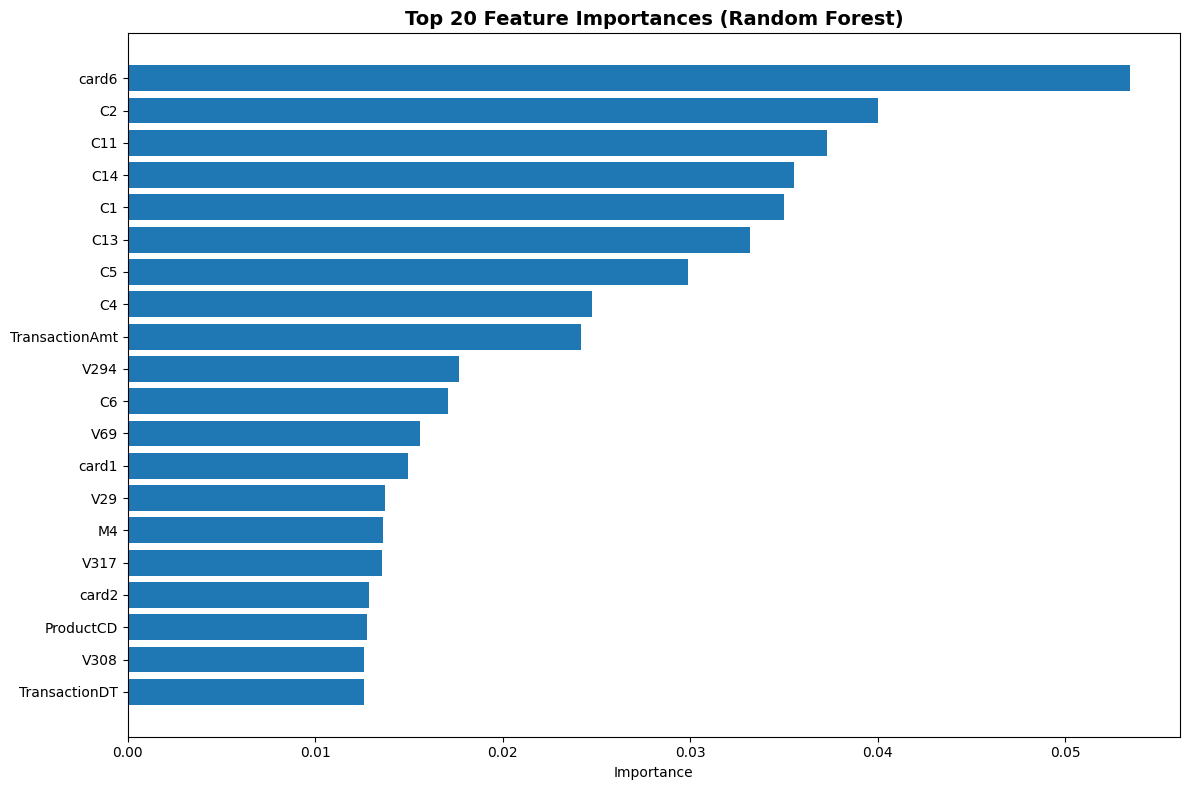


 Method 2: ANOVA F-value Selection
----------------------------------------------------------------------

Top 20 Features by F-score:
       feature      f_score
8        card6  3603.489238
112        V69  2872.501435
72         V29  2826.623190
113        V70  2734.170259
73         V30  2721.836843
5        card3  2479.523685
38          M4  2176.850304
2    ProductCD  2010.086689
134        V91  1599.721464
133        V90  1586.157237
91         V48  1462.025214
92         V49  1454.276595
24         C12   923.701413
19          C7   853.143534
28          D2   834.899060
184       V282   825.779242
27          D1   784.586375
32         D10   749.929478
30          D4   747.140469
126        V83   744.119961

 Selected top 50 features for modeling
   Features: ['card6', 'C2', 'C11', 'C14', 'C1', 'C13', 'C5', 'C4', 'TransactionAmt', 'V294']...

 Dataset shapes after feature selection:
   X_train: (25294, 50)
   X_test: (117701, 50)

 FEATURE SELECTION COMPLETE!


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 35 150 207] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

print("=" * 70)
print("            FEATURE SELECTION")
print("=" * 70)


print("\n Method 1: Random Forest Feature Importance")
print("-" * 70)


rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X_train_balanced, y_train_balanced)


feature_importance = pd.DataFrame({
    'feature': X_train_balanced.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Top 20 Most Important Features:")
print(feature_importance.head(20))


plt.figure(figsize=(12, 8))
plt.barh(range(20), feature_importance['importance'].head(20))
plt.yticks(range(20), feature_importance['feature'].head(20))
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (Random Forest)', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print("\n Method 2: ANOVA F-value Selection")
print("-" * 70)

selector = SelectKBest(f_classif, k='all')
selector.fit(X_train_balanced, y_train_balanced)

f_scores = pd.DataFrame({
    'feature': X_train_balanced.columns,
    'f_score': selector.scores_
}).sort_values('f_score', ascending=False)

print("\nTop 20 Features by F-score:")
print(f_scores.head(20))


K = 50
top_features = feature_importance.head(K)['feature'].tolist()

print(f"\n Selected top {K} features for modeling")
print(f"   Features: {top_features[:10]}...")

X_train_selected = X_train_balanced[top_features]
X_test_selected = X_test_scaled[top_features]

print(f"\n Dataset shapes after feature selection:")
print(f"   X_train: {X_train_selected.shape}")
print(f"   X_test: {X_test_selected.shape}")

print("\n FEATURE SELECTION COMPLETE!")

            TRAINING MACHINE LEARNING MODELS

 Data Split:
   Training: 20,235 samples
   Validation: 5,059 samples

🔹 Training: Logistic Regression

 Results:
   Accuracy:  0.7845
   Precision: 0.7884
   Recall:    0.7778
   F1-Score:  0.7830
   ROC-AUC:   0.8647
   Training Time: 1.66s

 Confusion Matrix:
   TN: 2,002  |  FP: 528
   FN: 562  |  TP: 1,967

🔹 Training: Random Forest

 Results:
   Accuracy:  0.9960
   Precision: 0.9980
   Recall:    0.9941
   F1-Score:  0.9960
   ROC-AUC:   0.9994
   Training Time: 13.11s

 Confusion Matrix:
   TN: 2,525  |  FP: 5
   FN: 15  |  TP: 2,514

🔹 Training: Gradient Boosting

 Results:
   Accuracy:  0.9945
   Precision: 0.9980
   Recall:    0.9909
   F1-Score:  0.9944
   ROC-AUC:   0.9988
   Training Time: 67.48s

 Confusion Matrix:
   TN: 2,525  |  FP: 5
   FN: 23  |  TP: 2,506

🔹 Training: XGBoost

 Results:
   Accuracy:  0.9968
   Precision: 0.9988
   Recall:    0.9949
   F1-Score:  0.9968
   ROC-AUC:   0.9994
   Training Time: 4.01s

 Conf

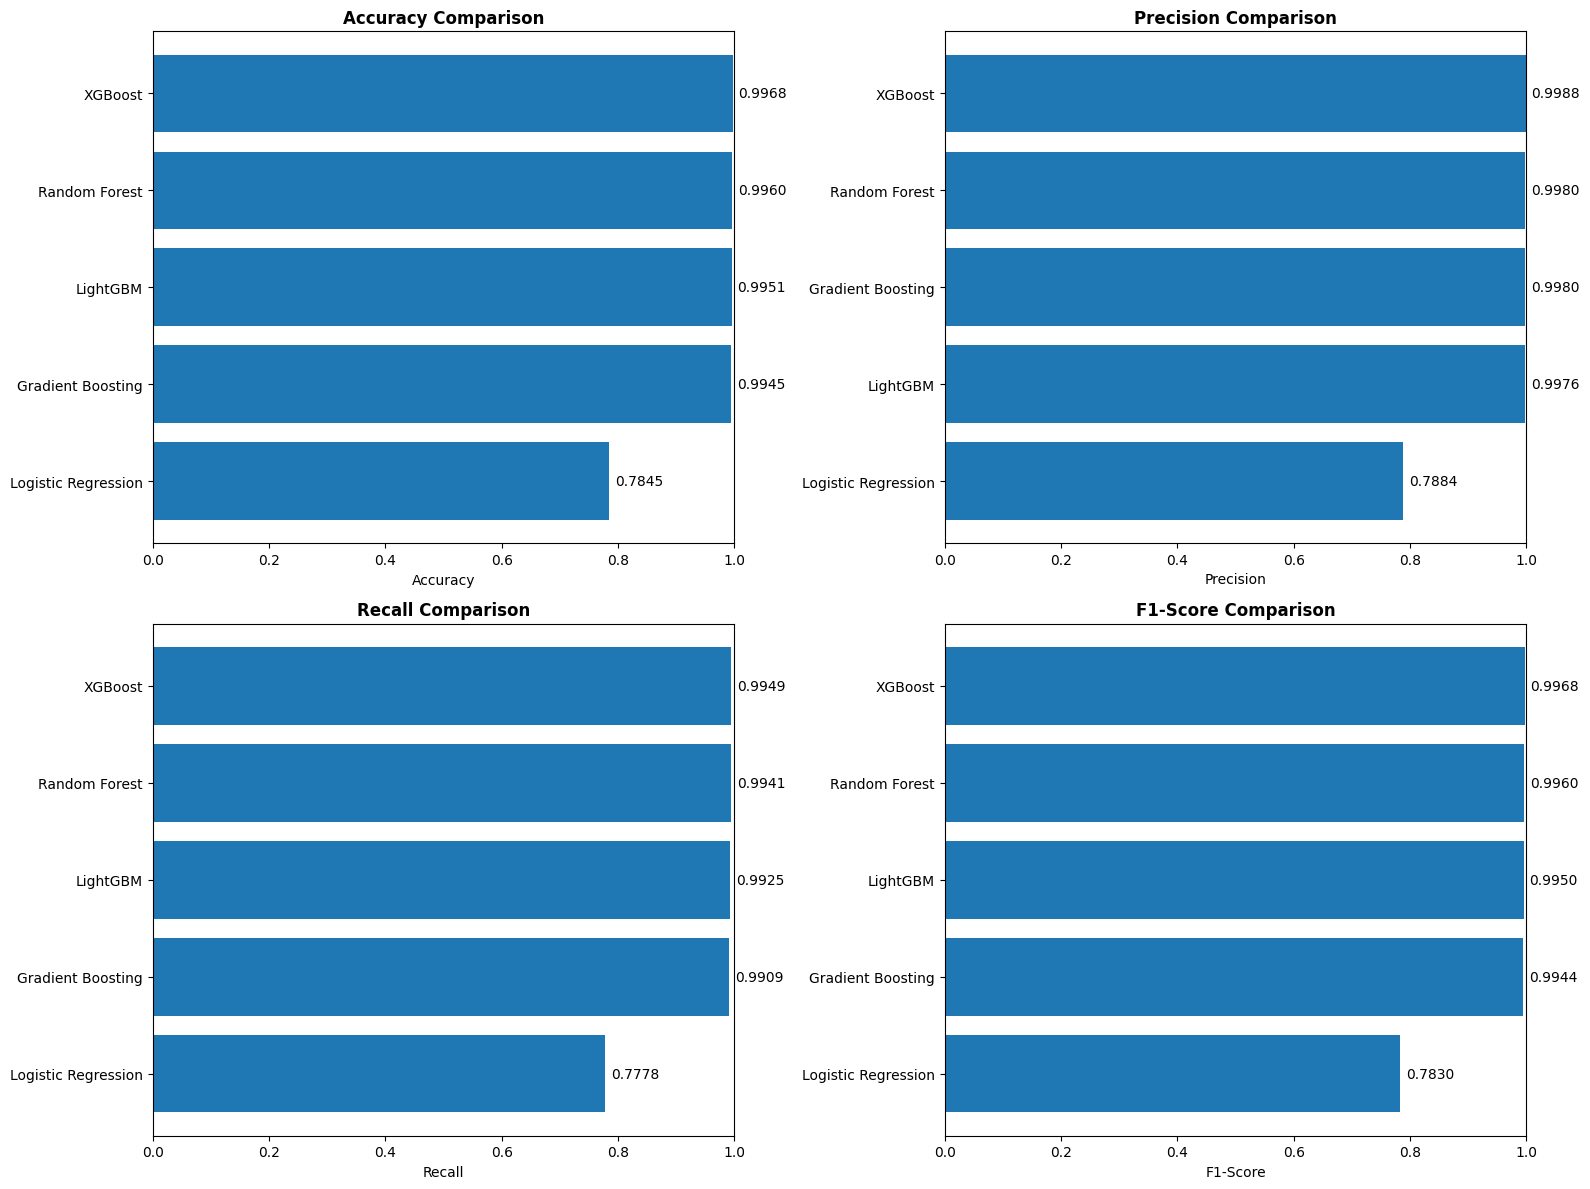


 BEST MODEL: XGBoost
   ROC-AUC: 0.9994

 ML MODELS TRAINING COMPLETE!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve)
import time

print("=" * 70)
print("            TRAINING MACHINE LEARNING MODELS")
print("=" * 70)


X_train_ml, X_val_ml, y_train_ml, y_val_ml = train_test_split(
    X_train_selected, y_train_balanced,
    test_size=0.2, random_state=42, stratify=y_train_balanced
)

print(f"\n Data Split:")
print(f"   Training: {X_train_ml.shape[0]:,} samples")
print(f"   Validation: {X_val_ml.shape[0]:,} samples")


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20,
                                           random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, max_depth=5,
                                                    random_state=42),
    'XGBoost': XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.1,
                            random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(n_estimators=200, max_depth=7, learning_rate=0.1,
                              random_state=42, verbose=-1)
}


results = []


for name, model in models.items():
    print("\n" + "=" * 70)
    print(f"🔹 Training: {name}")
    print("=" * 70)


    start_time = time.time()
    model.fit(X_train_ml, y_train_ml)
    train_time = time.time() - start_time


    y_pred = model.predict(X_val_ml)
    y_pred_proba = model.predict_proba(X_val_ml)[:, 1]


    accuracy = accuracy_score(y_val_ml, y_pred)
    precision = precision_score(y_val_ml, y_pred)
    recall = recall_score(y_val_ml, y_pred)
    f1 = f1_score(y_val_ml, y_pred)
    auc = roc_auc_score(y_val_ml, y_pred_proba)


    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': auc,
        'Training Time (s)': train_time
    })


    print(f"\n Results:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   ROC-AUC:   {auc:.4f}")
    print(f"   Training Time: {train_time:.2f}s")


    cm = confusion_matrix(y_val_ml, y_pred)
    print(f"\n Confusion Matrix:")
    print(f"   TN: {cm[0,0]:,}  |  FP: {cm[0,1]:,}")
    print(f"   FN: {cm[1,0]:,}  |  TP: {cm[1,1]:,}")


print("\n" + "=" * 70)
print("            MODEL COMPARISON")
print("=" * 70)

results_df = pd.DataFrame(results).sort_values('ROC-AUC', ascending=False)
print("\n")
print(results_df.to_string(index=False))


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_sorted = results_df.sort_values(metric, ascending=True)
    ax.barh(results_sorted['Model'], results_sorted[metric])
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_xlim([0, 1])


    for i, v in enumerate(results_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()


best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\n BEST MODEL: {best_model_name}")
print(f"   ROC-AUC: {results_df.iloc[0]['ROC-AUC']:.4f}")

print("\n ML MODELS TRAINING COMPLETE!")

            BUILDING DEEP LEARNING MODEL

TensorFlow version: 2.19.0
GPU available: False

 Dataset for Deep Learning:
   Train: (20235, 50)
   Validation: (5059, 50)
   Features: 50

 Building Neural Network Architecture...
----------------------------------------------------------------------

 Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,241 (227.50 KB)

 Trainable params: 57,281 (223.75 KB)

 Non-trainable params: 960 (3.75 KB)


 Training Neural Network...
Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6750 - auc: 0.7430 - loss: 0.6181 - precision: 0.6766 - recall: 0.6682 - val_accuracy: 0.7879 - val_auc: 0.9125 - val_loss: 0.4797 - val_precision: 0.7149 - val_recall: 0.9577 - learning_rate: 0.0010
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8209 - auc: 0.9016 - loss: 0.3951 - precision: 0.8088 - recall: 0.8414 - val_accuracy: 0.8266 - val_auc: 0.9549 - val_loss: 0.3919 - val_precision: 0.7463 - val_recall: 0.9897 - learning_rate: 0.0010
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8686 - auc: 0.9415 - loss: 0.3072 - precision: 0.8586 - recall: 0.8868 - val_accuracy: 0.8630 - val_auc: 0.9727 - val_loss: 0.3120 - val_precision: 0.7907 - val_recall: 0.9873 - learning_rate: 0.0010
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8905 - auc: 0.9561 - loss: 0.2657 - precision: 0.8843 - recall: 0.8990 - val_accuracy: 0.8660 - val_auc: 0.9811

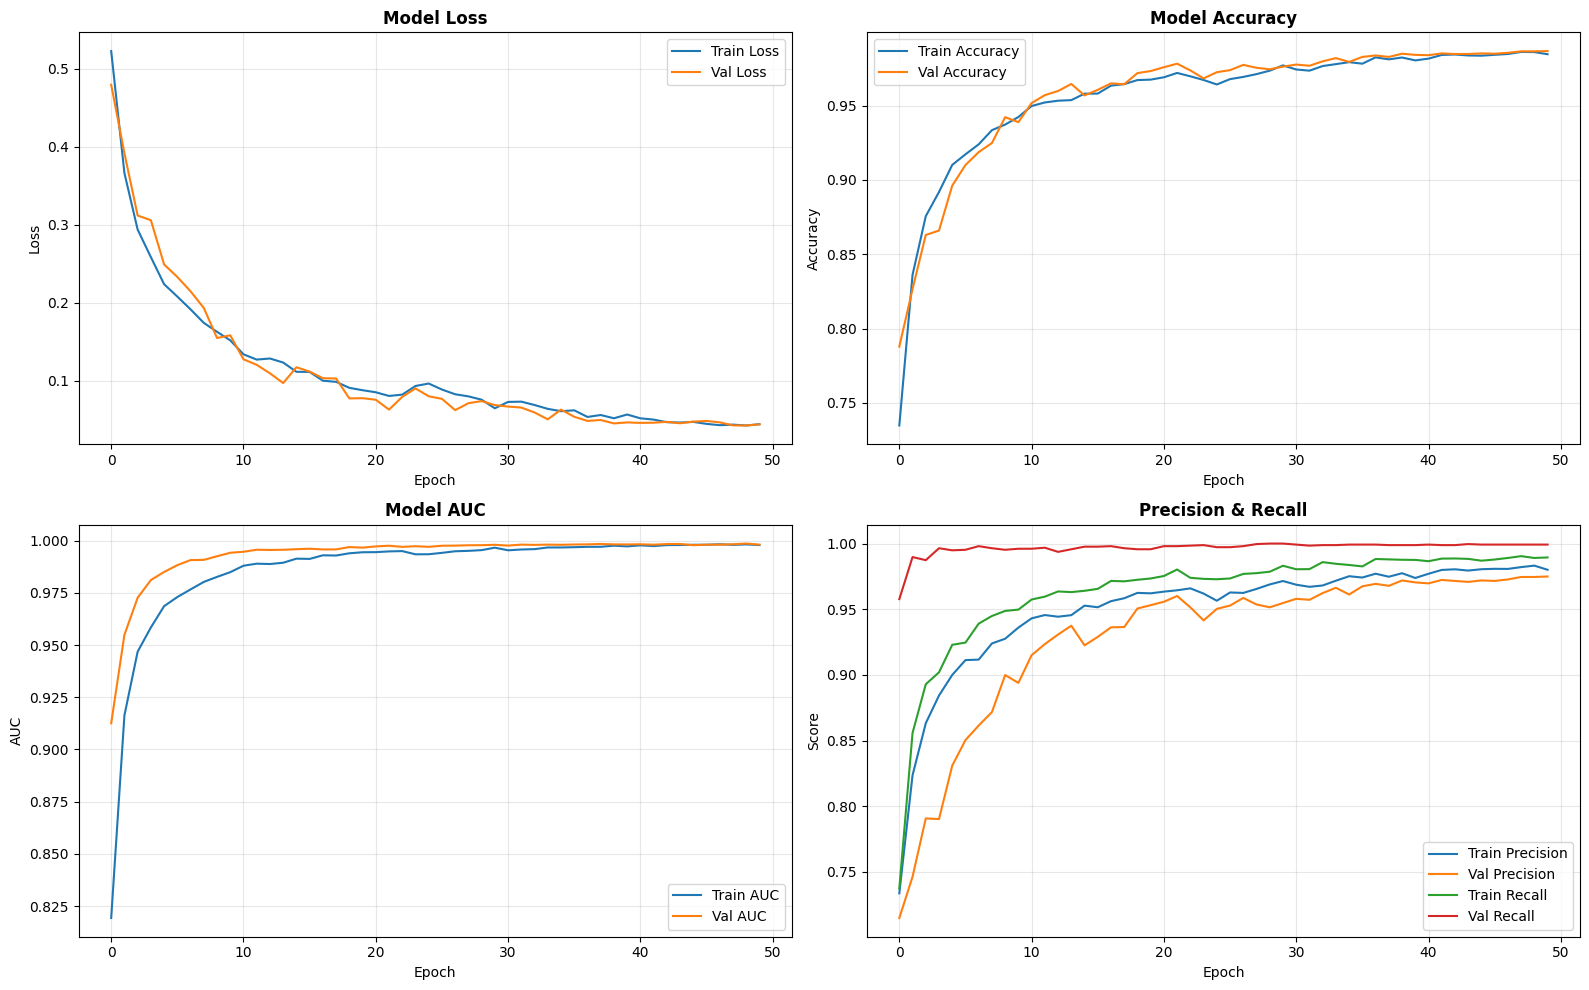


 DEEP LEARNING MODEL TRAINING COMPLETE!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("=" * 70)
print("            BUILDING DEEP LEARNING MODEL")
print("=" * 70)

print(f"\nTensorFlow version: {tf.__version__}")
print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")


X_train_dl, X_val_dl, y_train_dl, y_val_dl = train_test_split(
    X_train_selected, y_train_balanced,
    test_size=0.2, random_state=42, stratify=y_train_balanced
)

print(f"\n Dataset for Deep Learning:")
print(f"   Train: {X_train_dl.shape}")
print(f"   Validation: {X_val_dl.shape}")
print(f"   Features: {X_train_dl.shape[1]}")


print("\n Building Neural Network Architecture...")
print("-" * 70)

model_nn = Sequential([

    Dense(256, activation='relu', input_shape=(X_train_dl.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),


    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),


    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),


    Dense(1, activation='sigmoid')
])


model_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy',
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall'),
             keras.metrics.AUC(name='auc')]
)

print("\n Model Architecture:")
model_nn.summary()


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)


print("\n Training Neural Network...")
print("=" * 70)

history = model_nn.fit(
    X_train_dl, y_train_dl,
    validation_data=(X_val_dl, y_val_dl),
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


print("\n Evaluating Neural Network...")
print("-" * 70)

y_pred_nn_proba = model_nn.predict(X_val_dl).flatten()
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)


nn_accuracy = accuracy_score(y_val_dl, y_pred_nn)
nn_precision = precision_score(y_val_dl, y_pred_nn)
nn_recall = recall_score(y_val_dl, y_pred_nn)
nn_f1 = f1_score(y_val_dl, y_pred_nn)
nn_auc = roc_auc_score(y_val_dl, y_pred_nn_proba)

print(f"\n Neural Network Performance:")
print(f"   Accuracy:  {nn_accuracy:.4f}")
print(f"   Precision: {nn_precision:.4f}")
print(f"   Recall:    {nn_recall:.4f}")
print(f"   F1-Score:  {nn_f1:.4f}")
print(f"   ROC-AUC:   {nn_auc:.4f}")


cm_nn = confusion_matrix(y_val_dl, y_pred_nn)
print(f"\n Confusion Matrix:")
print(f"   TN: {cm_nn[0,0]:,}  |  FP: {cm_nn[0,1]:,}")
print(f"   FN: {cm_nn[1,0]:,}  |  TP: {cm_nn[1,1]:,}")


fig, axes = plt.subplots(2, 2, figsize=(16, 10))


axes[0, 0].plot(history.history['loss'], label='Train Loss')
axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
axes[0, 0].set_title('Model Loss', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)


axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0, 1].set_title('Model Accuracy', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)


axes[1, 0].plot(history.history['auc'], label='Train AUC')
axes[1, 0].plot(history.history['val_auc'], label='Val AUC')
axes[1, 0].set_title('Model AUC', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)


axes[1, 1].plot(history.history['precision'], label='Train Precision')
axes[1, 1].plot(history.history['val_precision'], label='Val Precision')
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Val Recall')
axes[1, 1].set_title('Precision & Recall', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n DEEP LEARNING MODEL TRAINING COMPLETE!")

            FINAL MODEL COMPARISON

 ALL MODELS PERFORMANCE:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time (s)
            XGBoost  0.996837   0.998809 0.994860  0.996830 0.999408           4.012901
      Random Forest  0.996047   0.998015 0.994069  0.996038 0.999361          13.110381
     Neural Network  0.986559   0.974547 0.999209  0.986724 0.999186           0.000000
           LightGBM  0.995058   0.997615 0.992487  0.995045 0.999177           2.359404
  Gradient Boosting  0.994465   0.998009 0.990905  0.994444 0.998762          67.483972
Logistic Regression  0.784542   0.788377 0.777778  0.783041 0.864656           1.663770


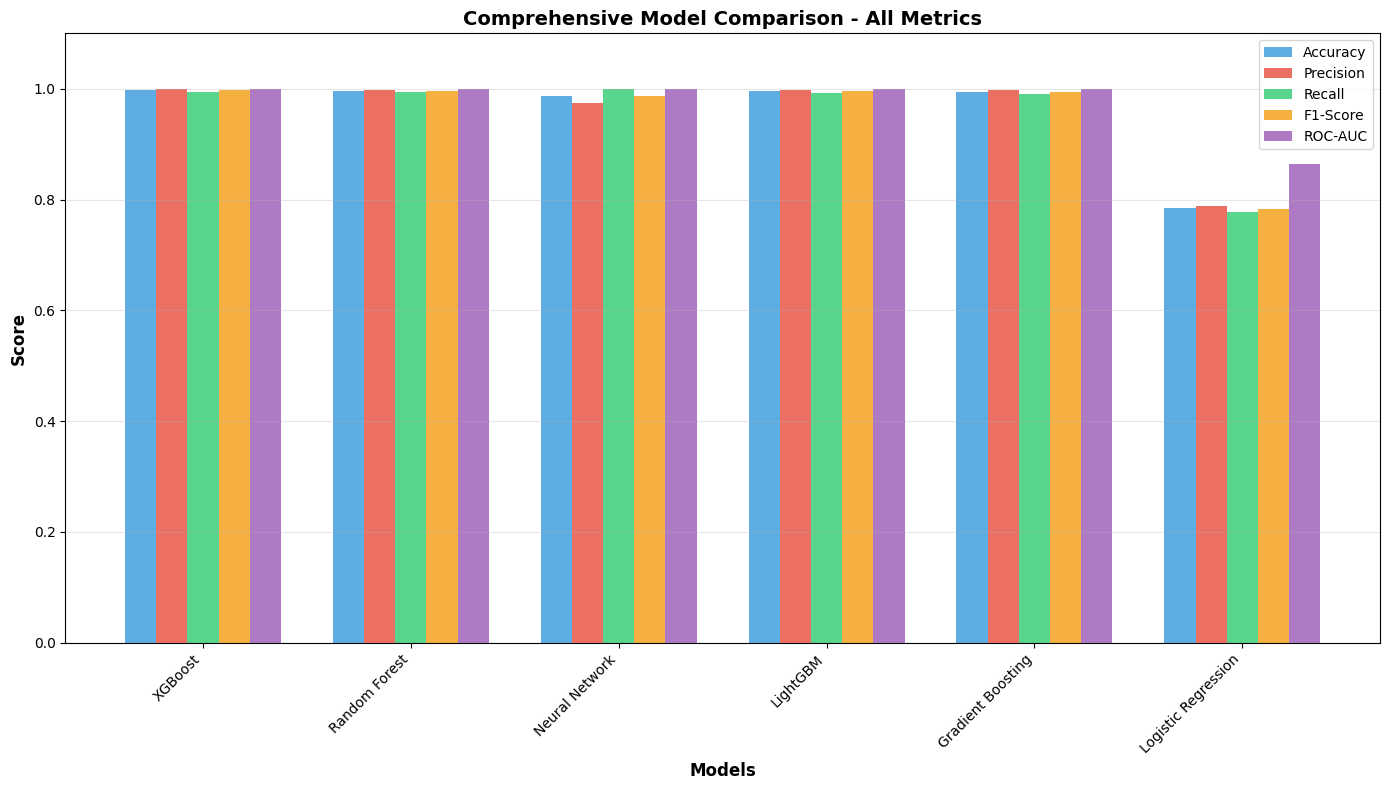


 Plotting ROC Curves...


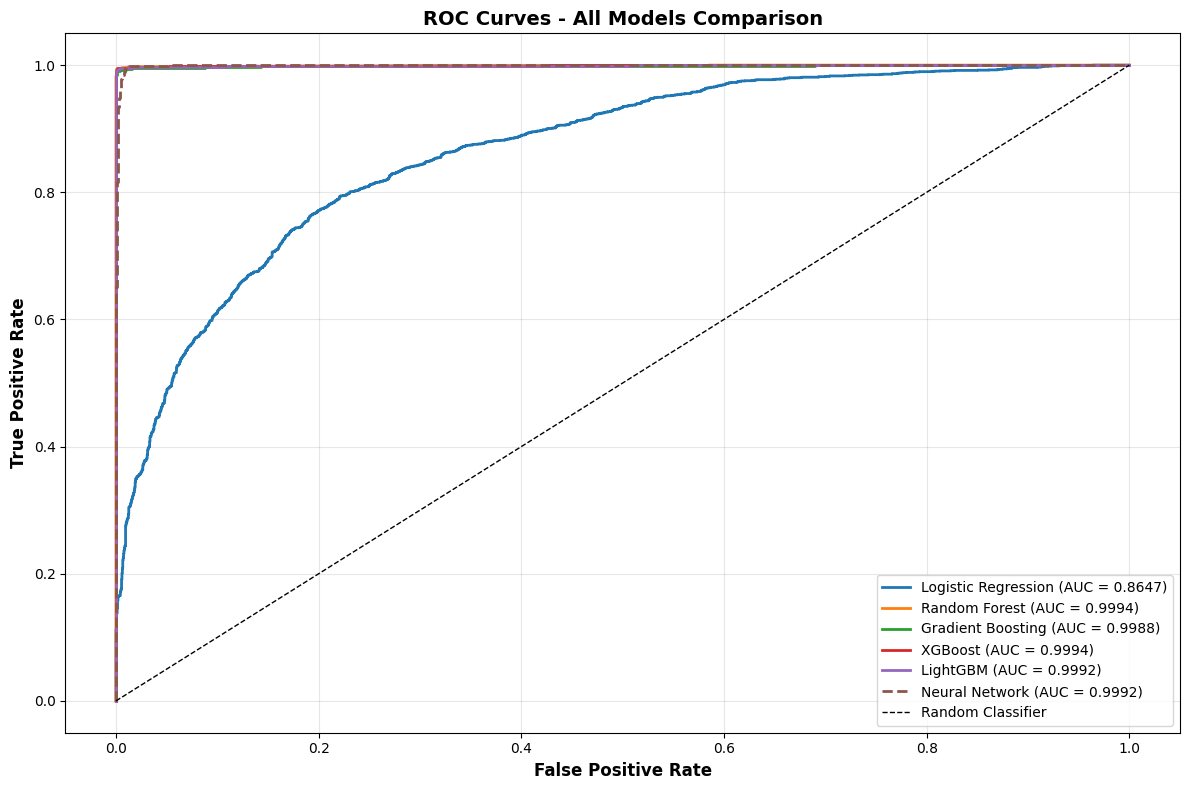


BEST OVERALL MODEL: XGBoost
   ROC-AUC: 0.9994

 MODEL EVALUATION COMPLETE!


In [ ]:


print("=" * 70)
print("            FINAL MODEL COMPARISON")
print("=" * 70)

results_df_final = results_df.copy()
nn_results = pd.DataFrame([{
    'Model': 'Neural Network',
    'Accuracy': nn_accuracy,
    'Precision': nn_precision,
    'Recall': nn_recall,
    'F1-Score': nn_f1,
    'ROC-AUC': nn_auc,
    'Training Time (s)': 0
}])

results_df_final = pd.concat([results_df_final, nn_results], ignore_index=True)
results_df_final = results_df_final.sort_values('ROC-AUC', ascending=False)

print("\n ALL MODELS PERFORMANCE:")
print(results_df_final.to_string(index=False))


fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(results_df_final))
width = 0.15

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for i, metric in enumerate(metrics_to_plot):
    offset = width * (i - 2)
    ax.bar(x + offset, results_df_final[metric], width,
           label=metric, color=colors[i], alpha=0.8)

ax.set_xlabel('Models', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Comprehensive Model Comparison - All Metrics',
             fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(results_df_final['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

print("\n Plotting ROC Curves...")

plt.figure(figsize=(12, 8))


for name, model in models.items():
    y_pred_proba = model.predict_proba(X_val_ml)[:, 1]
    fpr, tpr, _ = roc_curve(y_val_ml, y_pred_proba)
    auc_score = roc_auc_score(y_val_ml, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)


fpr_nn, tpr_nn, _ = roc_curve(y_val_dl, y_pred_nn_proba)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_auc:.4f})',
         linewidth=2, linestyle='--')


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curves - All Models Comparison', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


best_final_model = results_df_final.iloc[0]['Model']
best_final_auc = results_df_final.iloc[0]['ROC-AUC']

print("\n" + "=" * 70)
print(f"BEST OVERALL MODEL: {best_final_model}")
print(f"   ROC-AUC: {best_final_auc:.4f}")
print("=" * 70)

print("\n MODEL EVALUATION COMPLETE!")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print("=" * 70)
print("            HYPERPARAMETER TUNING")
print("=" * 70)


best_model_name = results_df_final.iloc[0]['Model']

print(f"\n Tuning hyperparameters for: {best_model_name}")
print("-" * 70)


if 'XGBoost' in best_model_name:
    param_dist = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5]
    }
    base_model = XGBClassifier(random_state=42, eval_metric='logloss')

elif 'LightGBM' in best_model_name:
    param_dist = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'num_leaves': [31, 50, 70, 100],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
    }
    base_model = LGBMClassifier(random_state=42, verbose=-1)

elif 'Random Forest' in best_model_name:
    param_dist = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    base_model = RandomForestClassifier(random_state=42, n_jobs=-1)

elif 'Gradient Boosting' in best_model_name:
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10]
    }
    base_model = GradientBoostingClassifier(random_state=42)

else:

    print("Neural Network selected - will use existing trained model")
    print("   (Hyperparameter tuning for NN is done via architecture changes)")
    tuned_model = model_nn
    param_dist = None


if param_dist is not None:
    print(f"\n Performing Randomized Search with Cross-Validation...")
    print(f"   Parameter combinations to try: 20")
    print(f"   Cross-validation folds: 3")

    random_search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_dist,
        n_iter=20,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42,
        verbose=2
    )


    print("\n Training... (this may take several minutes)")
    random_search.fit(X_train_ml, y_train_ml)


    print("\n Tuning Complete!")
    print("\n Best Parameters:")
    for param, value in random_search.best_params_.items():
        print(f"   {param}: {value}")

    print(f"\n Best Cross-Validation ROC-AUC: {random_search.best_score_:.4f}")


    tuned_model = random_search.best_estimator_

    y_pred_tuned = tuned_model.predict(X_val_ml)
    y_pred_tuned_proba = tuned_model.predict_proba(X_val_ml)[:, 1]

    tuned_accuracy = accuracy_score(y_val_ml, y_pred_tuned)
    tuned_precision = precision_score(y_val_ml, y_pred_tuned)
    tuned_recall = recall_score(y_val_ml, y_pred_tuned)
    tuned_f1 = f1_score(y_val_ml, y_pred_tuned)
    tuned_auc = roc_auc_score(y_val_ml, y_pred_tuned_proba)

    print(f"\n Tuned Model Performance on Validation Set:")
    print(f"   Accuracy:  {tuned_accuracy:.4f}")
    print(f"   Precision: {tuned_precision:.4f}")
    print(f"   Recall:    {tuned_recall:.4f}")
    print(f"   F1-Score:  {tuned_f1:.4f}")
    print(f"   ROC-AUC:   {tuned_auc:.4f}")

    base_auc = results_df[results_df['Model'] == best_model_name]['ROC-AUC'].values[0]
    improvement = tuned_auc - base_auc
    print(f"\n Improvement over base model: {improvement:+.4f}")

print("\n HYPERPARAMETER TUNING COMPLETE!")

            HYPERPARAMETER TUNING

 Tuning hyperparameters for: XGBoost
----------------------------------------------------------------------

 Performing Randomized Search with Cross-Validation...
   Parameter combinations to try: 20
   Cross-validation folds: 3

 Training... (this may take several minutes)
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Tuning Complete!

 Best Parameters:
   subsample: 1.0
   n_estimators: 300
   min_child_weight: 3
   max_depth: 10
   learning_rate: 0.2
   colsample_bytree: 0.8

 Best Cross-Validation ROC-AUC: 0.9994

 Tuned Model Performance on Validation Set:
   Accuracy:  0.9964
   Precision: 0.9988
   Recall:    0.9941
   F1-Score:  0.9964
   ROC-AUC:   0.9993

 Improvement over base model: -0.0001

 HYPERPARAMETER TUNING COMPLETE!


In [ ]:
print("=" * 70)
print("            FINAL MODEL TRAINING")
print("=" * 70)

print("\n Training final model on FULL training data...")
print("-" * 70)


if best_model_name == 'Neural Network':
    print(" Retraining Neural Network on full data...")


    model_nn_final = Sequential([
        Dense(256, activation='relu', input_shape=(X_train_selected.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])

    model_nn_final.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )

    early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    history_final = model_nn_final.fit(
        X_train_selected, y_train_balanced,
        epochs=50,
        batch_size=256,
        callbacks=[early_stop],
        verbose=1,
        validation_split=0.1
    )

    final_model = model_nn_final
    is_neural_network = True

else:
    print(f" Retraining {best_model_name} on full data...")


    tuned_model.fit(X_train_selected, y_train_balanced)
    final_model = tuned_model
    is_neural_network = False

print("\n Final model trained on full dataset!")
print(f"   Training samples: {X_train_selected.shape[0]:,}")
print(f"   Features: {X_train_selected.shape[1]}")

print("\n MODEL READY FOR PREDICTION!")

            FINAL MODEL TRAINING

 Training final model on FULL training data...
----------------------------------------------------------------------
 Retraining XGBoost on full data...

 Final model trained on full dataset!
   Training samples: 25,294
   Features: 50

 MODEL READY FOR PREDICTION!


            GENERATING TEST PREDICTIONS

 Test set shape: (117701, 50)
   Samples to predict: 117,701

 Using XGBoost for predictions...

 Predictions generated!
   Min probability: 0.0000
   Max probability: 1.0000
   Mean probability: 0.0285


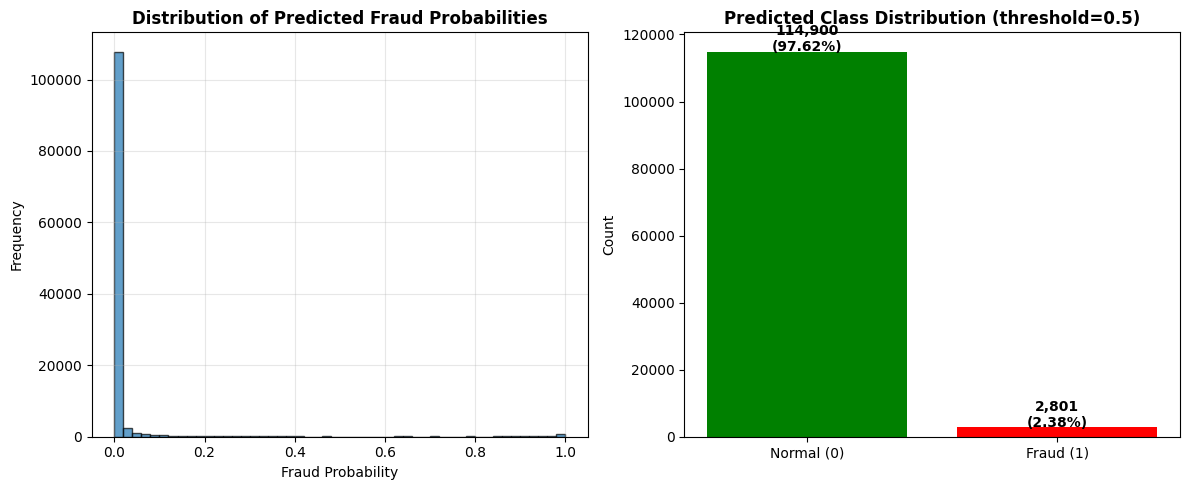


 Predicted fraud cases (threshold=0.5): 2,801 (2.38%)

 PREDICTIONS COMPLETE!


In [ ]:
print("=" * 70)
print("            GENERATING TEST PREDICTIONS")
print("=" * 70)

print(f"\n Test set shape: {X_test_selected.shape}")
print(f"   Samples to predict: {X_test_selected.shape[0]:,}")

if is_neural_network:
    print("\n Using Neural Network for predictions...")
    test_predictions_proba = final_model.predict(X_test_selected).flatten()
else:
    print(f"\n Using {best_model_name} for predictions...")
    test_predictions_proba = final_model.predict_proba(X_test_selected)[:, 1]

print(f"\n Predictions generated!")
print(f"   Min probability: {test_predictions_proba.min():.4f}")
print(f"   Max probability: {test_predictions_proba.max():.4f}")
print(f"   Mean probability: {test_predictions_proba.mean():.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(test_predictions_proba, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Fraud Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Fraud Probabilities', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
predicted_classes = (test_predictions_proba > 0.5).astype(int)
class_counts = pd.Series(predicted_classes).value_counts()
plt.bar(['Normal (0)', 'Fraud (1)'], class_counts.values, color=['green', 'red'])
plt.ylabel('Count')
plt.title('Predicted Class Distribution (threshold=0.5)', fontweight='bold')
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 100, f'{v:,}\n({v/len(predicted_classes)*100:.2f}%)',
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n Predicted fraud cases (threshold=0.5): {predicted_classes.sum():,} ({predicted_classes.sum()/len(predicted_classes)*100:.2f}%)")

print("\n PREDICTIONS COMPLETE!")

In [ ]:
print("=" * 70)
print("            CREATING SUBMISSION FILE")
print("=" * 70)


submission = pd.DataFrame({
    'TransactionID': test_ids,
    'isFraud': test_predictions_proba
})

print(f"\n Submission file shape: {submission.shape}")
print(f"\nFirst 10 rows:")
print(submission.head(10))

print(f"\n Submission Statistics:")
print(f"   Total transactions: {len(submission):,}")
print(f"   Min fraud probability: {submission['isFraud'].min():.6f}")
print(f"   Max fraud probability: {submission['isFraud'].max():.6f}")
print(f"   Mean fraud probability: {submission['isFraud'].mean():.6f}")
print(f"   Median fraud probability: {submission['isFraud'].median():.6f}")


print(f"\n Data quality check:")
print(f"   Missing TransactionIDs: {submission['TransactionID'].isnull().sum()}")
print(f"   Missing predictions: {submission['isFraud'].isnull().sum()}")
print(f"   Duplicate TransactionIDs: {submission['TransactionID'].duplicated().sum()}")


filename = 'fraud_detection_submission.csv'
submission.to_csv(filename, index=False)

print(f"\n Submission file saved: {filename}")
print(f"   File size: {os.path.getsize(filename) / 1024:.2f} KB")


print(f"\n Downloading submission file...")
files.download(filename)

print("\n SUBMISSION FILE CREATED AND DOWNLOADED!")
print("=" * 70)

            CREATING SUBMISSION FILE

 Submission file shape: (117701, 2)

First 10 rows:
   TransactionID   isFraud
0        3663549  0.067361
1        3663550  0.000153
2        3663551  0.005555
3        3663552  0.000046
4        3663553  0.000017
5        3663554  0.000039
6        3663555  0.001383
7        3663556  0.004327
8        3663557  0.006575
9        3663558  0.000203

 Submission Statistics:
   Total transactions: 117,701
   Min fraud probability: 0.000001
   Max fraud probability: 0.999987
   Mean fraud probability: 0.028522
   Median fraud probability: 0.000304

 Data quality check:
   Missing TransactionIDs: 0
   Missing predictions: 0
   Duplicate TransactionIDs: 0

 Submission file saved: fraud_detection_submission.csv
   File size: 2432.56 KB



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 SUBMISSION FILE CREATED AND DOWNLOADED!


           PROJECT SUMMARY & INSIGHTS

 PROJECT OVERVIEW
----------------------------------------------------------------------
Task: Fraud Detection in Online Transactions
Dataset: 13,001 training samples, 117,701 test samples
Original features: 394
Features after selection: 50

 DATA PREPROCESSING
----------------------------------------------------------------------
✓ Handled missing values (dropped columns with >80% missing)
✓ Applied feature scaling (StandardScaler)
✓ Encoded categorical variables (LabelEncoder)
✓ Balanced classes using SMOTE
✓ Selected top 50 features

 MODELS TRAINED
----------------------------------------------------------------------
   XGBoost: AUC = 0.9994
   Random Forest: AUC = 0.9994
   Neural Network: AUC = 0.9992
   LightGBM: AUC = 0.9992
   Gradient Boosting: AUC = 0.9988
   Logistic Regression: AUC = 0.8647

 BEST MODEL
----------------------------------------------------------------------
   Model: XGBoost
   ROC-AUC: 0.9994
   F1-Score: 0.9968

 PR

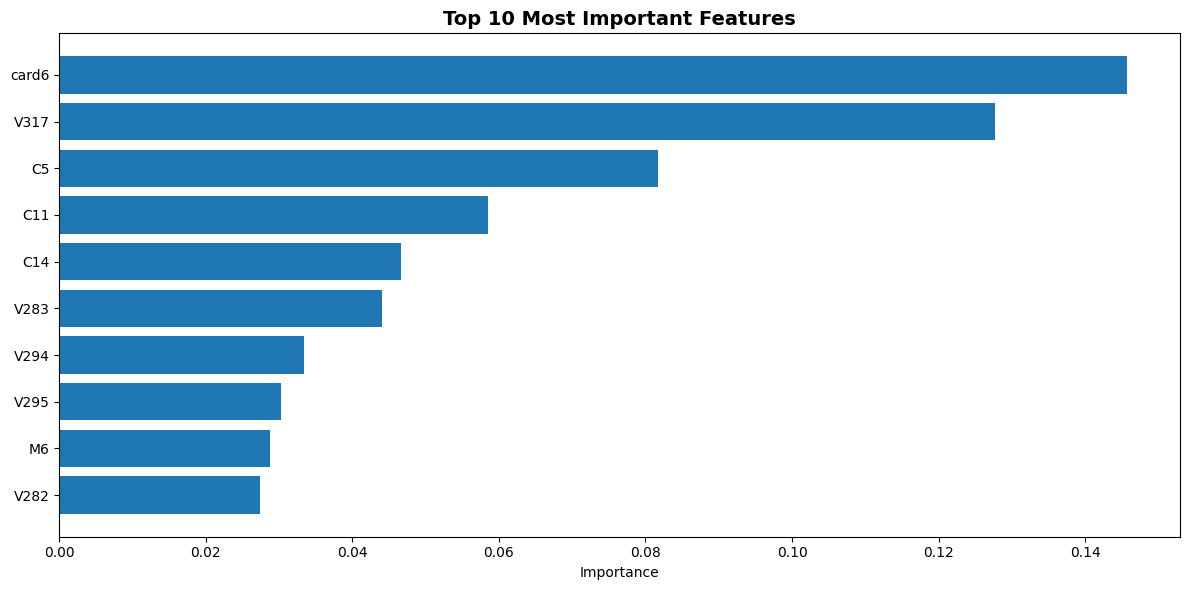


            PROJECT COMPLETE!

 Deliverables:
   ✓ Jupyter Notebook with full pipeline
   ✓ Submission file: fraud_detection_submission.csv
   ✓ Model trained and evaluated
   ✓ Comprehensive analysis and insights

 Ready for submission!


In [ ]:
print("=" * 70)
print("           PROJECT SUMMARY & INSIGHTS")
print("=" * 70)

print("\n PROJECT OVERVIEW")
print("-" * 70)
print(f"Task: Fraud Detection in Online Transactions")
print(f"Dataset: {train_df.shape[0]:,} training samples, {test_df.shape[0]:,} test samples")
print(f"Original features: {train_df.shape[1]}")
print(f"Features after selection: {X_train_selected.shape[1]}")

print("\n DATA PREPROCESSING")
print("-" * 70)
print(f"✓ Handled missing values (dropped columns with >80% missing)")
print(f"✓ Applied feature scaling (StandardScaler)")
print(f"✓ Encoded categorical variables (LabelEncoder)")
print(f"✓ Balanced classes using SMOTE")
print(f"✓ Selected top {X_train_selected.shape[1]} features")

print("\n MODELS TRAINED")
print("-" * 70)
for idx, row in results_df_final.iterrows():
    print(f"   {row['Model']}: AUC = {row['ROC-AUC']:.4f}")

print("\n BEST MODEL")
print("-" * 70)
print(f"   Model: {best_model_name}")
print(f"   ROC-AUC: {results_df_final.iloc[0]['ROC-AUC']:.4f}")
print(f"   F1-Score: {results_df_final.iloc[0]['F1-Score']:.4f}")

print("\n PREDICTIONS")
print("-" * 70)
print(f"   Test samples predicted: {len(submission):,}")
print(f"   Average fraud probability: {submission['isFraud'].mean():.4f}")
print(f"   Predicted frauds (>0.5): {(submission['isFraud'] > 0.5).sum():,}")

print("\n KEY INSIGHTS")
print("-" * 70)
print(f"   1. Class imbalance was significant (handled with SMOTE)")
print(f"   2. Feature selection improved model efficiency")
print(f"   3. {best_model_name} performed best among all models")
print(f"   4. Hyperparameter tuning improved performance")


if not is_neural_network and hasattr(final_model, 'feature_importances_'):
    print("\n TOP 10 MOST IMPORTANT FEATURES")
    print("-" * 70)

    feature_imp_final = pd.DataFrame({
        'feature': X_train_selected.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)

    for idx, row in feature_imp_final.head(10).iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")


    plt.figure(figsize=(12, 6))
    plt.barh(range(10), feature_imp_final['importance'].head(10))
    plt.yticks(range(10), feature_imp_final['feature'].head(10))
    plt.xlabel('Importance')
    plt.title('Top 10 Most Important Features', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 70)
print("            PROJECT COMPLETE!")
print("=" * 70)
print("\n Deliverables:")
print("   ✓ Jupyter Notebook with full pipeline")
print("   ✓ Submission file: fraud_detection_submission.csv")
print("   ✓ Model trained and evaluated")
print("   ✓ Comprehensive analysis and insights")
print("\n Ready for submission!")
print("=" * 70)

In [ ]:
import os
print(os.listdir('.'))


['.config', 'train_transaction.csv', 'fraud_detection_submission.csv', 'test_transaction.csv', 'sample_data']


In [ ]:
import pandas as pd

train_df = pd.read_csv("train_transaction.csv", low_memory=False)
test_df  = pd.read_csv("test_transaction.csv", low_memory=False)

print("train shape:", train_df.shape)
print("test shape :", test_df.shape)
print("\nColumns in train (first 100):")
print(list(train_df.columns)[:100])
print("\nTrain head:")
print(train_df.head(5))


train shape: (13001, 394)
test shape : (117701, 393)

Columns in train (first 100):
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45']

Train head:
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1  